# Week 1: Linear Regression using one variable

The purpose of this notebook is to explore linear regression on a real world problem.

In this notebook, we will:
- Use pandas to load the dataset
- Use linear regression models provided in scikit-learn to fit the data
- Use obtained weights obtained to predict and compute RSS
- Use matplotlib to visualize how well the model fits to the data

## Installation Instructions

The following libraries needs to installed:
- numpy
- pandas
- scikit-learn
- matplotlib
- jupyter

They can be installed with a single command:

        pip install numpy pandas scikit-learn matplotlib jupyter

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this will print the graphs in the notebook itself
%matplotlib inline

# this will make sure the results are same for everyone using this notebook
# you can set any other random seed, but the results may differ
np.random.seed(2017)

## Load the data

In [2]:
# loads the data into a pandas dataframe
df_data = pd.read_csv('kc_house_data.csv')
df_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's see what columns we have in the dataframe. Some potential features can be picked from here.

In [3]:
print "Columns: ", list(df_data)

Columns:  ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Split the data

We cannot simply train on the entire dataset. We will keep a part of it separately which will later be used to check the performance of our model on unseen data. We will call this unseen data, **test data** and the data which will be used for training the model as **train data**. Simple, isn't it?

We will use `scikit-learn`'s functions to split the data into train and test data.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df_train, df_test = train_test_split(df_data, train_size = 0.8, random_state=1)
print "Train samples:", len(df_train.index), "(80%)"  # 17290
print "Test samples:", len(df_test.index), "(20%)"  # 4323

Train samples: 17290 (80%)
Test samples: 4323 (20%)


/home/ashish/ml_workshop/venv/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Learning a Linear Regression model

Here, we will design a linear regression model with only one training feature, `sqft_living`, the area (in square feet) of the house. We will then use this model to predict the house prices.

As discussed last week, we will add a bias term to the model as a way to impart our knowledge in the model.

So, the model can be represented as:

price = w$_0$*x$_0$ + w$_1$*x$_1$

where 

w$_0$, w$_1$ = weights

x$_0$ = bias (here x$_0$ = 1, can be any constant)

x$_1$ =  feature(s) [here, sqft_living]

In [6]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [7]:
features = ['sqft_living']  # only one feature
targets = ['price']  # only one target

# some operations necessary for training the model
train_feats = np.array(df_train[features]).reshape(-1, 1)
train_targets = np.array(df_train[targets]).reshape(-1, 1)

lin_model = LinearRegression()

In [8]:
# fits the model to the training data
# updates the coefficients of the model
lin_model.fit(train_feats, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Checking weights

Now that we have fitted our linear model to the data, we can extract the learned weights.

In [9]:
print "Weights: "
print "x_0 =", lin_model.intercept_, ", x_1 =", lin_model.coef_

Weights: 
x_0 = [-30186.36106105] , x_1 = [[ 273.82181112]]


**Question**: What can you infer from the learned weights?

# Predicting House prices

Let's check the performance of our model on some unseen data aka, the **test dataset**.  
For clean visualization purposes, we have restricted ourselves to the first 1000 samples.  

Feel free to replace that with any other number or erase it to predict on the entire test dataset.

In [10]:
test_feats = np.array(df_test[features][:1000]).reshape(-1, 1)
test_targets = np.array(df_test[targets][:1000]).reshape(-1,1)

test_preds = lin_model.predict(test_feats)

In [11]:
print test_preds[0]  # should be 733776.4919685

[ 733776.4919685]


/home/ashish/ml_workshop/venv/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


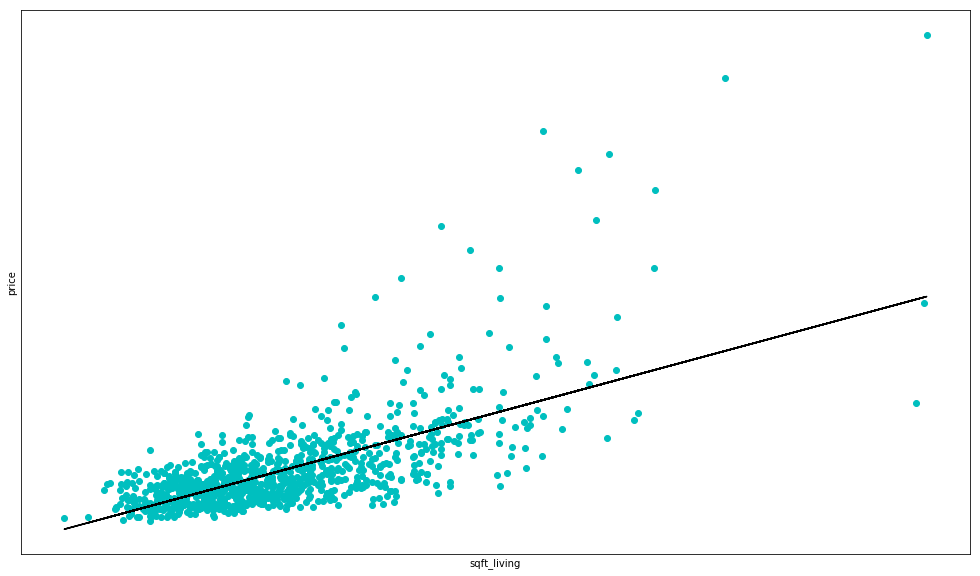

In [12]:
fig = plt.figure(figsize=(17,10))
plt.scatter(test_feats, test_targets, figure=fig, color='c')
plt.plot(test_feats, test_preds, figure=fig, color='k')

plt.xlabel('sqft_living');
plt.ylabel('price')

plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

# Determine Total Error

Plotting a graph is one way of checking how well the model is performing. It serves a great purpose of visualizing the performance.  
However to quantify, we need to determine the error using suitable error metric.  

Residual Sum of Squares (RSS) is a popular error metric for regression problems.

In [13]:
def residual_sum_of_squares(model, features, target):
    # given features and the model, get the predictions
    pred = model.predict(features)
    
    # compute the residuals/errors
    res = target - pred
    
    # sum the squares of residuals to get rss
    rss = (res*res).sum()
    return rss

Compute the RSS on the **test** data using the above function.

In [14]:
test_feats = np.array(df_test[features]).reshape(-1, 1)
test_targets = np.array(df_test[targets]).reshape(-1, 1)

rss_test = residual_sum_of_squares(lin_model, test_feats, test_targets)

print "RSS:", rss_test  # should be 3.70613272596e+14

RSS: 3.70613272596e+14


**Question**: What do you think of the error? Why might be the reason for it being so large?

This will be followed up in the next notebook.

# Things to explore further

- Use another feature  
Just like we used the living area in square feet, `sqft_living`, to base our predictions on, any of the other features can be used.  
Some suggestions would be # of bedrooms, # of bathrooms, area of the lot (sqft_lot)

- Use another error metric  
Yet another common erorr metric used in regression problems is R$^2$ score, the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination).

In [15]:
# starter for r2_score function
def r2_score(model, features, targets):
    # given features and the model, get the predictions
    preds = model.predict(features)
    
    # compute the residuals/errors
    res = targets - preds
    
    # compute the mean of observed targets
    mean = targets.mean()
    
    # compute total sum of squares
    var = targets - mean
    total_ss = (var*var).sum()
    
    # compute residual sum of squares
    rss = (res*res).sum()
    
    # compute r2_score
    r2 = 1 - (rss/total_ss)
    
    return r2

Compute the R$^2$ score on the **test** data using the above function.

In [16]:
r2_test = r2_score(lin_model, test_feats, test_targets)
print "r2_score:", r2_test  # should be 0.503301900647

r2_score: 0.503301900647


Closer the value of R$^2$ score to 1, better is the model.  
We can see that our model performs around 50% well according to R$^2$score. We will explore how this can be improved in the next notebook.